# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preparing Data

In [4]:
trainImages = pd.read_csv('archive/sign_mnist_train/sign_mnist_train.csv')
testImages = pd.read_csv('archive/sign_mnist_test/sign_mnist_test.csv')

yTrain = trainImages['label'].values
yTest = testImages['label'].values

xTrain = trainImages.drop(['label'], axis=1).values
xTest = testImages.drop(['label'], axis=1).values

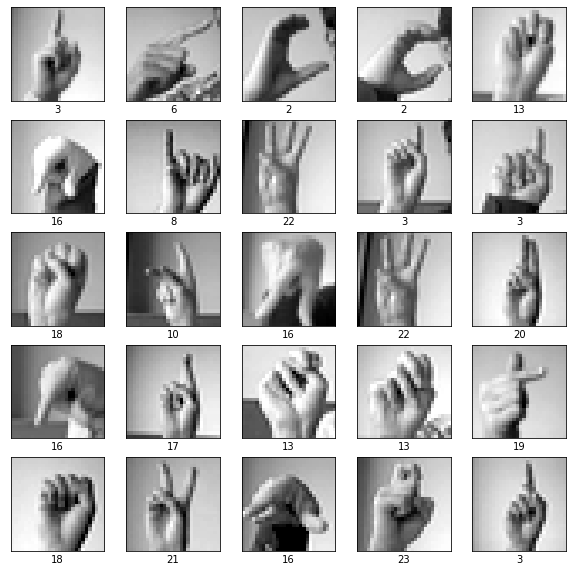

In [5]:
xTrain = xTrain.reshape(-1,28,28)
xTest = xTest.reshape(-1,28,28)
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTrain[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(yTrain[i])

plt.show()

# Resaping, Normalization and Encoding

In [7]:
xTrain = xTrain.reshape(-1,28,28,1)
xTest = xTest.reshape(-1,28,28,1)

xTrain = xTrain / 255.0
xTest = xTest / 255.0 

In [8]:
xTrain.shape

(27455, 28, 28, 1)

In [9]:
labelBinrizer = LabelBinarizer()
yTrain = labelBinrizer.fit_transform(yTrain)
yTest = labelBinrizer.fit_transform(yTest)

# Image Augmentation

In [10]:
trainDatagen = ImageDataGenerator(rotation_range=30, zoom_range=0.2,            horizontal_flip=True, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, fill_mode='nearest')

validationDatagen = ImageDataGenerator()

# Build our Model

In [14]:
model = Sequential()

# Input Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())

# Hidden Layers
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(BatchNormalization())

# Output Layers
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(BatchNormalization())

model.add(Flatten())

# Dense Layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(24, activation='softmax'))

# Create the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

# Train our Model

In [16]:
history = model.fit_generator(trainDatagen.flow(xTrain, yTrain, batch_size=32),
                              steps_per_epoch= len(xTrain) // 32,
                              epochs=10,
                              validation_data=validationDatagen.flow(xTest, yTest, batch_size=32),
                              validation_steps=len(xTest) // 32)

Epoch 1/10
857/857 [==============================] - 89s 101ms/step - loss: 2.3698 - accuracy: 0.3058 - val_loss: 1.2551 - val_accuracy: 0.6137
Epoch 2/10
857/857 [==============================] - 82s 95ms/step - loss: 0.8073 - accuracy: 0.7290 - val_loss: 1.1029 - val_accuracy: 0.7037
Epoch 3/10
857/857 [==============================] - 81s 94ms/step - loss: 0.4645 - accuracy: 0.8414 - val_loss: 0.3234 - val_accuracy: 0.8800
Epoch 4/10
857/857 [==============================] - 84s 98ms/step - loss: 0.3412 - accuracy: 0.8843 - val_loss: 0.2151 - val_accuracy: 0.9191
Epoch 5/10
857/857 [==============================] - 83s 97ms/step - loss: 0.2840 - accuracy: 0.9025 - val_loss: 0.3290 - val_accuracy: 0.8982
Epoch 6/10
857/857 [==============================] - 83s 96ms/step - loss: 0.2519 - accuracy: 0.9173 - val_loss: 0.0881 - val_accuracy: 0.9710
Epoch 7/10
857/857 [==============================] - 102s 119ms/step - loss: 0.1917 - accuracy: 0.9333 - val_loss: 0.3155 - val_accura

# Evaluate our Model

let's test our model

In [17]:
model.evaluate(xTest, yTest, verbose=0)

[0.09761174023151398, 0.9616564512252808]

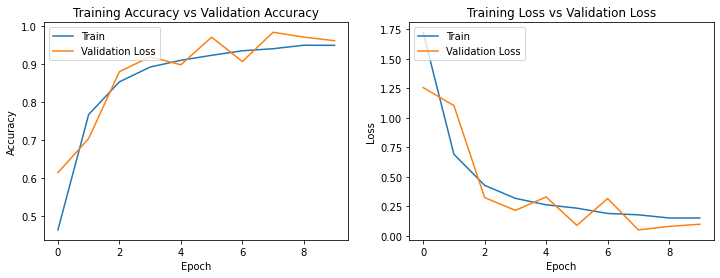

In [20]:
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

# Graph 1 (left)
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].legend(["Train", "Validation Loss"], loc="upper left")

# Graph 2 (right)
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")
ax[1].legend(["Train", "Validation Loss"], loc="upper left")

plt.show()